In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [39]:
# Generate mock transaction data
np.random.seed(42)
num_transactions = 5000
num_customers = 500
products = [f'Prod_{100+i}' for i in range(20)]
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)
date_range_days = (end_date - start_date).days
transaction_data = []


In [40]:
# Customer spending profiles
customer_profiles = {
    f'CUST{1000+i}': {'avg_spend': np.random.uniform(10, 200), 'frequency_factor': np.random.uniform(0.1, 1)}
    for i in range(num_customers)
}
for i in range(num_transactions):
    customer_id = f'CUST{1000 + np.random.randint(0, num_customers)}'
    transaction_date = start_date + timedelta(days=np.random.randint(0, date_range_days))
    num_items_in_transaction = np.random.randint(1, 6)

    for _ in range(num_items_in_transaction):
        product_id = np.random.choice(products)
        quantity = np.random.randint(1, 4)
        unit_price = np.random.uniform(5, 100) * (customer_profiles[customer_id]['avg_spend'] / 50) # Tie price to customer profile somewhat
        unit_price = round(max(1.0, unit_price), 2)

        transaction_data.append({
            'TransactionID': f'TRX{50000+i}_{_}',
            'CustomerID': customer_id,
            'TransactionDate': transaction_date.strftime('%Y-%m-%d'),
            'ProductID': product_id,
            'Quantity': quantity,
            'UnitPrice': unit_price
        })

df_transactions = pd.DataFrame(transaction_data)
df_transactions['TotalPrice'] = df_transactions['Quantity'] * df_transactions['UnitPrice']

In [41]:
df_transactions.to_csv('customer_transactions_mock_data.csv', index=False)

In [42]:
df=pd.read_csv('customer_transactions_mock_data.csv')

In [43]:
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalPrice
0,TRX50000_0,CUST1302,2022-01-12,Prod_107,3,53.74,161.22
1,TRX50000_1,CUST1302,2022-01-12,Prod_104,2,43.15,86.30
2,TRX50000_2,CUST1302,2022-01-12,Prod_107,1,59.80,59.80
3,TRX50001_0,CUST1267,2023-10-17,Prod_108,1,214.31,214.31
4,TRX50001_1,CUST1267,2023-10-17,Prod_109,3,312.02,936.06


In [44]:
# check missing value 
df.isnull().sum()

TransactionID      0
CustomerID         0
TransactionDate    0
ProductID          0
Quantity           0
UnitPrice          0
TotalPrice         0
dtype: int64

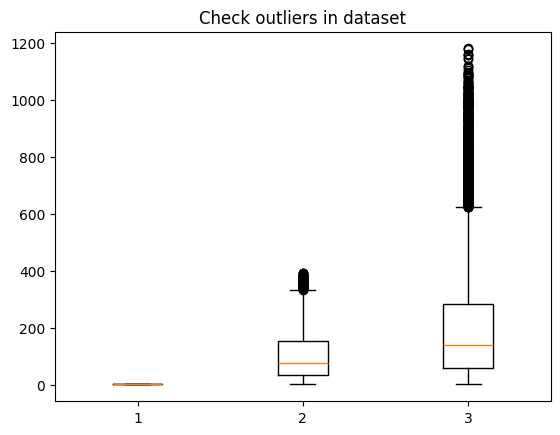

In [45]:
numeric_columns=['Quantity','UnitPrice','TotalPrice']
plt.Figure(figsize=(12,6))
plt.boxplot(df[numeric_columns])
plt.title("Check outliers in dataset")
plt.show()


In [46]:
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalPrice
0,TRX50000_0,CUST1302,2022-01-12,Prod_107,3,53.74,161.22
1,TRX50000_1,CUST1302,2022-01-12,Prod_104,2,43.15,86.30
2,TRX50000_2,CUST1302,2022-01-12,Prod_107,1,59.80,59.80
3,TRX50001_0,CUST1267,2023-10-17,Prod_108,1,214.31,214.31
4,TRX50001_1,CUST1267,2023-10-17,Prod_109,3,312.02,936.06


In [47]:
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])


In [48]:
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalPrice
0,TRX50000_0,CUST1302,2022-01-12,Prod_107,3,53.74,161.22
1,TRX50000_1,CUST1302,2022-01-12,Prod_104,2,43.15,86.30
2,TRX50000_2,CUST1302,2022-01-12,Prod_107,1,59.80,59.80
3,TRX50001_0,CUST1267,2023-10-17,Prod_108,1,214.31,214.31
4,TRX50001_1,CUST1267,2023-10-17,Prod_109,3,312.02,936.06


In [49]:
# Calculate Recency: How recently a customer made a purchase
df["Recency"]=(datetime.now() - df['TransactionDate']).dt.days
# Calculate Frequency: How often a customer makes purchases.
df['Frequency'] = df.groupby('CustomerID')['TransactionID'].transform('count')


In [50]:
# Calculate Monetary Value: How much money a customer spends.
monetary=df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.columns=['CustomerID','Monetaryvalue']
df=df.merge(monetary,on='CustomerID',how='left')

In [51]:
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalPrice,Recency,Frequency,Monetaryvalue
0,TRX50000_0,CUST1302,2022-01-12,Prod_107,3,53.74,161.22,1236,14,1028.53
1,TRX50000_1,CUST1302,2022-01-12,Prod_104,2,43.15,86.30,1236,14,1028.53
2,TRX50000_2,CUST1302,2022-01-12,Prod_107,1,59.80,59.80,1236,14,1028.53
3,TRX50001_0,CUST1267,2023-10-17,Prod_108,1,214.31,214.31,593,38,12639.74
4,TRX50001_1,CUST1267,2023-10-17,Prod_109,3,312.02,936.06,593,38,12639.74


In [52]:
df['R_score']=pd.qcut(df['Recency'],5,labels=[5,4,3,2,1])
df['F_score']=pd.qcut(df['Frequency'],5,labels=[1,2,3,4,5])
df['M_score']=pd.qcut(df['Monetaryvalue'],5,labels=[1,2,3,4,5])

In [53]:
df['RFM_score']=df['R_score'].astype(int)+df['F_score'].astype(int)+df['M_score'].astype(int)

In [54]:
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalPrice,Recency,Frequency,Monetaryvalue,R_score,F_score,M_score,RFM_score
0,TRX50000_0,CUST1302,2022-01-12,Prod_107,3,53.74,161.22,1236,14,1028.53,1,1,1,3
1,TRX50000_1,CUST1302,2022-01-12,Prod_104,2,43.15,86.30,1236,14,1028.53,1,1,1,3
2,TRX50000_2,CUST1302,2022-01-12,Prod_107,1,59.80,59.80,1236,14,1028.53,1,1,1,3
3,TRX50001_0,CUST1267,2023-10-17,Prod_108,1,214.31,214.31,593,38,12639.74,5,4,5,14
4,TRX50001_1,CUST1267,2023-10-17,Prod_109,3,312.02,936.06,593,38,12639.74,5,4,5,14


In [55]:
from scipy.stats import skew
print(skew(df['Recency']))
print(skew(df['Frequency']))
print(skew(df['Monetaryvalue']))

0.008272439214367945
0.06232581795722967
0.6272202294390297


In [56]:
df['Monetaryvalue']=np.log1p(df['Monetaryvalue'])

In [57]:
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalPrice,Recency,Frequency,Monetaryvalue,R_score,F_score,M_score,RFM_score
0,TRX50000_0,CUST1302,2022-01-12,Prod_107,3,53.74,161.22,1236,14,6.936858,1,1,1,3
1,TRX50000_1,CUST1302,2022-01-12,Prod_104,2,43.15,86.30,1236,14,6.936858,1,1,1,3
2,TRX50000_2,CUST1302,2022-01-12,Prod_107,1,59.80,59.80,1236,14,6.936858,1,1,1,3
3,TRX50001_0,CUST1267,2023-10-17,Prod_108,1,214.31,214.31,593,38,9.444680,5,4,5,14
4,TRX50001_1,CUST1267,2023-10-17,Prod_109,3,312.02,936.06,593,38,9.444680,5,4,5,14


In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Recency_scaler','Frequency_scaler','Monetaryvalue_scaler']]=scaler.fit_transform(df[['Recency','Frequency','Monetaryvalue']])

In [59]:
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalPrice,Recency,Frequency,Monetaryvalue,R_score,F_score,M_score,RFM_score,Recency_scaler,Frequency_scaler,Monetaryvalue_scaler
0,TRX50000_0,CUST1302,2022-01-12,Prod_107,3,53.74,161.22,1236,14,6.936858,1,1,1,3,1.658034,-1.97568,-1.941658
1,TRX50000_1,CUST1302,2022-01-12,Prod_104,2,43.15,86.30,1236,14,6.936858,1,1,1,3,1.658034,-1.97568,-1.941658
2,TRX50000_2,CUST1302,2022-01-12,Prod_107,1,59.80,59.80,1236,14,6.936858,1,1,1,3,1.658034,-1.97568,-1.941658
3,TRX50001_0,CUST1267,2023-10-17,Prod_108,1,214.31,214.31,593,38,9.444680,5,4,5,14,-1.382741,0.42747,1.049282
4,TRX50001_1,CUST1267,2023-10-17,Prod_109,3,312.02,936.06,593,38,9.444680,5,4,5,14,-1.382741,0.42747,1.049282


In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
rfm_scaled= df[['Recency_scaler','Frequency_scaler','Monetaryvalue_scaler']]

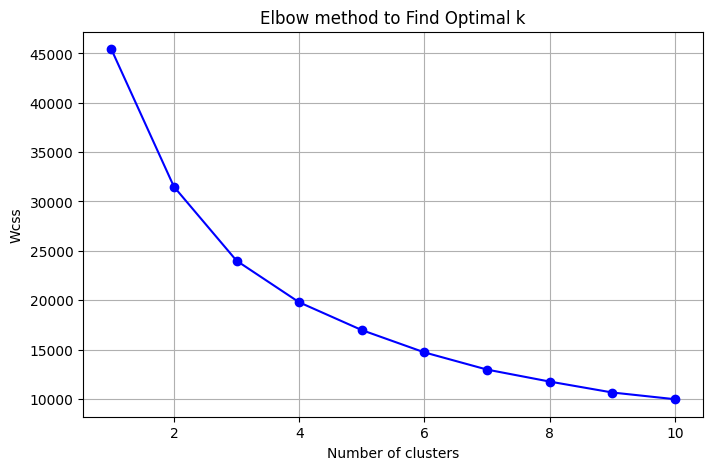

In [61]:
# 3. Elbow Method to find optimal number of clusters
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range,wcss,'bo-')
plt.xlabel("Number of clusters")
plt.ylabel('Wcss')
plt.title("Elbow method to Find Optimal k")
plt.grid(True)
plt.show()

In [62]:
kmeans=KMeans(n_clusters=4,random_state=42)
df['Cluster']=kmeans.fit_predict(rfm_scaled)
print(df['Cluster'].value_counts())

cluster_summary=df.groupby('Cluster')[['Recency','Frequency','Monetaryvalue']].mean()
print(cluster_summary)

Cluster
1    4479
2    3956
0    3409
3    3299
Name: count, dtype: int64
             Recency  Frequency  Monetaryvalue
Cluster                                       
0        1052.356116  43.815782       9.037026
1         692.722706  37.310560       9.074094
2        1071.773256  26.958797       8.443376
3         750.952107  26.570476       7.531368


In [63]:
df.head(10)

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalPrice,Recency,Frequency,Monetaryvalue,R_score,F_score,M_score,RFM_score,Recency_scaler,Frequency_scaler,Monetaryvalue_scaler,Cluster
0,TRX50000_0,CUST1302,2022-01-12,Prod_107,3,53.74,161.22,1236,14,6.936858,1,1,1,3,1.658034,-1.97568,-1.941658,2
1,TRX50000_1,CUST1302,2022-01-12,Prod_104,2,43.15,86.30,1236,14,6.936858,1,1,1,3,1.658034,-1.97568,-1.941658,2
2,TRX50000_2,CUST1302,2022-01-12,Prod_107,1,59.80,59.80,1236,14,6.936858,1,1,1,3,1.658034,-1.97568,-1.941658,2
3,TRX50001_0,CUST1267,2023-10-17,Prod_108,1,214.31,214.31,593,38,9.444680,5,4,5,14,-1.382741,0.42747,1.049282,1
4,TRX50001_1,CUST1267,2023-10-17,Prod_109,3,312.02,936.06,593,38,9.444680,5,4,5,14,-1.382741,0.42747,1.049282,1
5,TRX50001_2,CUST1267,2023-10-17,Prod_106,2,51.36,102.72,593,38,9.444680,5,4,5,14,-1.382741,0.42747,1.049282,1
6,TRX50002_0,CUST1006,2022-05-17,Prod_115,2,151.57,303.14,1111,38,9.573283,1,4,5,10,1.066903,0.42747,1.202659,0
7,TRX50002_1,CUST1006,2022-05-17,Prod_117,3,292.25,876.75,1111,38,9.573283,1,4,5,10,1.066903,0.42747,1.202659,0
8,TRX50002_2,CUST1006,2022-05-17,Prod_106,3,118.77,356.31,1111,38,9.573283,1,4,5,10,1.066903,0.42747,1.202659,0
9,TRX50003_0,CUST1489,2023-09-07,Prod_113,3,82.71,248.13,633,22,8.436100,5,1,2,8,-1.193580,-1.17463,-0.153595,3


In [64]:
segment_names={
    0:'Old but loyal customers',
    1:'Loyal high spenders',
    2:'At-Risk Low spenders',
    3:'New or occassional customers'
}

cluster_summary['Segment name']=cluster_summary.index.map(segment_names)

In [65]:
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalPrice,Recency,Frequency,Monetaryvalue,R_score,F_score,M_score,RFM_score,Recency_scaler,Frequency_scaler,Monetaryvalue_scaler,Cluster
0,TRX50000_0,CUST1302,2022-01-12,Prod_107,3,53.74,161.22,1236,14,6.936858,1,1,1,3,1.658034,-1.97568,-1.941658,2
1,TRX50000_1,CUST1302,2022-01-12,Prod_104,2,43.15,86.30,1236,14,6.936858,1,1,1,3,1.658034,-1.97568,-1.941658,2
2,TRX50000_2,CUST1302,2022-01-12,Prod_107,1,59.80,59.80,1236,14,6.936858,1,1,1,3,1.658034,-1.97568,-1.941658,2
3,TRX50001_0,CUST1267,2023-10-17,Prod_108,1,214.31,214.31,593,38,9.444680,5,4,5,14,-1.382741,0.42747,1.049282,1
4,TRX50001_1,CUST1267,2023-10-17,Prod_109,3,312.02,936.06,593,38,9.444680,5,4,5,14,-1.382741,0.42747,1.049282,1


In [66]:
print(cluster_summary)

             Recency  Frequency  Monetaryvalue                  Segment name
Cluster                                                                     
0        1052.356116  43.815782       9.037026       Old but loyal customers
1         692.722706  37.310560       9.074094           Loyal high spenders
2        1071.773256  26.958797       8.443376          At-Risk Low spenders
3         750.952107  26.570476       7.531368  New or occassional customers
